In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os

In [194]:
string = 'EPA_vesterbrogade_130623.csv'
string.split('.')

['EPA_vesterbrogade_130623', 'csv']

In [191]:
path = 'Field_data/EPA_vesterbrogade_130623.csv'
df = pd.read_csv(path, sep = ';')
df = df.dropna()

df['Time'] = pd.to_timedelta(df['t_base'].str.split().str[1]).astype('timedelta64[s]')
df = df.set_index('Time')
df = df.drop('t_base', axis = 'columns')

display(df)

,Total ion current,m/Q 4,m/Q 5,m/Q 6,m/Q 7,m/Q 8,m/Q 9,m/Q 10,m/Q 11,m/Q 12,...,m/Q 296,m/Q 297,m/Q 298,m/Q 299,m/Q 300,m/Q 301,m/Q 302,m/Q 303,m/Q 304,m/Q 305
Time,,,,,,,,,,,,,,,,,,,,,
23828.0,-430.645,-0.030554,-0.0130929,-0.0219008,0.0128636,-0.014584,0.003435,0.00681712,-0.00306746,-0.006994,...,-0.000801342,-0.000327115,-0.00163436,-0.000571368,0.000183856,-0.000266045,0.000474191,0.000754002,-0.000627376,-0.000735509
23868.0,-213.803,0.008655,0.0167512,-0.0187638,-0.00803155,0.00359185,0.011341,0.00227908,-0.0120585,-0.010247,...,-0.000474664,0.000290517,-0.000573645,-0.000199629,-0.000565254,0.000650664,"-9,66E+00",-0.000885251,"-3,95E-01",0.000267663
23908.0,-121.505,-0.035176,-0.000210072,-0.00739187,0.00591064,-0.00911262,0.000276325,-0.00349578,0.00413983,0.001732,...,0.000231127,-0.000529346,-0.000802127,0.000326815,"-2,55E+00",0.000193102,-0.000270777,-0.000563939,-0.000185336,"-2,83E-01"
23948.0,-765.681,0.002961,-0.0208177,-0.00654431,-0.00226081,-0.00172708,-0.0113603,0.00534267,-0.00153519,-0.000738,...,"8,83E+00",-0.000579465,-0.000754001,-0.000975055,0.000444085,0.00114906,0.000556883,"8,25E+00","-2,51E+00",0.000241996
23988.0,-527.627,0.007105,-0.01293,-0.010469,-0.000163516,-0.00363533,-0.00136641,-0.00095616,-0.00460301,0.018680,...,-0.000231251,-0.000492281,0.000612036,0.00107891,"-2,66E+00",0.00113907,0.000287419,0.000393244,"-8,29E+00",0.000304483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41952.0,541.634,-0.003248,-0.0255537,-0.0333667,-0.0110635,-0.0129668,0.00629734,0.0065056,-0.0123574,0.019480,...,0.000278343,-0.000656501,-0.00058331,"-7,89E+00",0.00075576,-0.000194917,0.00194192,0.000190267,0.000450556,-0.000398248
41992.0,655.414,-0.032971,-0.0159822,-0.00444744,0.00329873,-0.000373758,0.0158177,0.0041369,0.000551383,0.006863,...,0.000535375,0.000130683,0.000263942,0.000783435,-0.000495021,-0.00156512,0.000623662,0.00024453,-0.000466655,-0.000891477
42032.0,479.216,0.026546,0.00244057,0.00114523,0.00497459,-0.0091897,-0.0111633,-0.0144681,-0.0111167,-0.035939,...,-0.000365284,0.000551857,-0.000365769,-0.000884212,-0.00155212,0.00131631,-0.000152175,0.00112214,-0.000549252,"-3,39E+00"


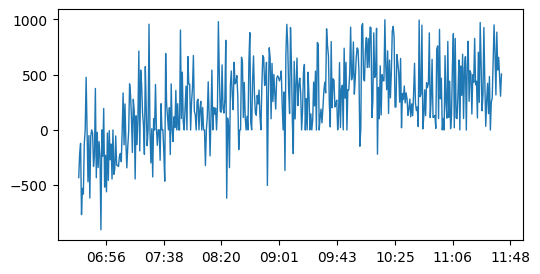

In [190]:
fig, ax = plt.subplots(figsize = (6, 3))

ax.plot(df.index, df['Total ion current'], lw = 1) #, width = 30)

formatter = FuncFormatter(lambda s, x: time.strftime('%H:%M', time.gmtime(s)))
ax.xaxis.set_major_formatter(formatter)

fig.savefig('test_plot.png', dpi = 600)